In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

# LOAD TRAIN

In [2]:
import sys
import os
os.getcwd()

'/hd/sample-proposal'

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
from lib.utils.process_input import get_gen_outs

In [5]:

from lib.config.control import *

In [6]:
# X_train, y_train, _, _ = SINGLESTGAN.load_input("train")
# X_valid, y_valid, _, _ = SINGLESTGAN.load_input("valid")
# X_train

In [7]:
import numpy as np

# Input

In [8]:
# import lib.data.preprocess as preprocess
# train_df, valid_df, test_df = preprocess.load_prepared()
# train_df.head()

In [9]:
# o_train, train_buyers, train_nonbuyers = t.load_with_filters("train")
# X = o_train[0]

In [10]:
from lib.utils.process_input import fit_one_hots, get_gen_outs,apply_encoder_in_batch
import numpy as np
def apply_pad_2(mat, N):
    res = [0 for i in range(0,mat.shape[0])]
    i = 0
    for sample in mat:
        res[i] = pad_array_with_constant_arr(sample,i,N)
#         res[i] = np.expand_dims(res[i],axis=2)
        i+=1

    return np.array(res)

gen_outs = get_gen_outs()
PAD_ARRAY = []
no_first = False

MASK_VALUE = -2
for out in gen_outs:
    if out != 1 :
        array_out = np.full(out+1, 0).tolist()
        array_out[0] = 1
        PAD_ARRAY = PAD_ARRAY + array_out
    else:
        array_out = np.full(out, MASK_VALUE).tolist()
        PAD_ARRAY = PAD_ARRAY + array_out
# PAD_ARRAY += [-1.327298, -0.764341, -1.745852, -1.501220, -0.451318, -1.508622, -1.357883]
PAD_ARRAY = np.array([PAD_ARRAY])

print(PAD_ARRAY, PAD_ARRAY.shape)

def pad_array_with_constant_arr(arr, i , N):
    diff_ = N - arr.shape[0] 
    repeated =  np.repeat(PAD_ARRAY, diff_, axis=0)
    return np.vstack((repeated,arr))

def pad_arr(arr,i,N):
    diff_ = N - arr.shape[0] 
    if diff_ == 0:
        return arr
    if diff_ < 0:
        return arr[-N:]
#     return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
    return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
#     return pad_sequ

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [11]:
from lib.utils.process_input import *
from lib.input.single_stg.scale import create_readable_df_stg
from lib.input.single_stg import scale
from imp import reload
    # Do some things.
# single = reload(single)
# scale = reload(scale)

In [12]:
# scale.create_readable_df_stg(apply_pad_2(np.zeros((1,4,302)), 13), gen_outs, encoders)

In [13]:
# inp_lengths = list(range(1,14))

# X_f = []
# label_inp = []
# for inp_len in inp_lengths:
#     X_f_i = [x for x in X_train if len(x) == inp_len]
#     inp_ls = [inp_len for k in range(0,len(X_f_i))]
#     label_inp += inp_ls
#     X_f += X_f_i
# len(X_f)

# label_inp = np.array(label_inp)

In [14]:
# X_train_pad = apply_pad(np.array(X_f), 13)
# X_train_pad.shape

In [15]:
# from sklearn.utils import shuffle

# X_train_pad, label_inp = shuffle(X_train_pad, label_inp)

In [16]:

import lib.input.single_stg as single
from lib.models.single_stage import training
from imp import reload
    # Do some things.
training = reload(training)
single = reload(single)

## construct_dataset

In [17]:
os.getcwd()

'/hd/sample-proposal'

In [18]:
from collections import Counter, defaultdict
from numpy.random import randint

import itertools



def get_balanced_dataset_for_gan(dataset, X_train, y_train, train_inp_len):
    print("Counter(train_inp_len)",Counter(train_inp_len))
    min_len_ct = min(list(Counter(train_inp_len).values()))
    
    X_dict = defaultdict(list)        
    for i in range(1,13+1):
        ix_inp = np.where(train_inp_len == i)[0]
        ix_rand = randint(0, len(ix_inp),min_len_ct)

        ix_inp_rand = ix_inp[ix_rand]
        X_batch = X_train[ix_inp_rand]
        y_train_batch = y_train[ix_inp_rand]
    
        
        X_dict[i].append((X_batch, y_train_batch))
         
    dataset['train_gan'] = X_dict
    return dataset

def get_normal_dataset_for_gan(dataset, X_train, train_inp_len):
    dataset['train_gan'] = X_train, train_inp_len
    return dataset

In [19]:
from lib.models.single_stage import training as t
from numpy.random import randint
from numpy import ones, zeros
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.utils import shuffle
from lib.utils import misc

def get_batch_non_supervised(X,y_n,len_inp,n_samples):
    ix = randint(0, X.shape[0], n_samples)
    X = X[ix]
    y_n = y_n[ix]
    len_inp = len_inp[ix]

    return X,y_n,len_inp

TOTAL_CAT = 1
def construct_dataset(use_undersampling=True, balance_gan=False, batch_non_supervised=500000):
    dataset = {} 
    ## train

    X_train, y_train_class, y_train_items, SIT_train, train_len_inp = t.load_input_data("train")

    # dataset = get_balanced_dataset_for_gan(dataset, X_train, y_train_class, train_len_inp) if balance_gan == True else get_normal_dataset_for_gan(dataset,X_train, train_len_inp)
    

    i = 0 
    n = 5
    if use_undersampling:
        X_train, y_train_class, y_train_items, train_len_inp = t.manual_undersampling(X_train, y_train_class, y_train_items, train_len_inp,n)

    X_train, X_valid, y_train_class, y_valid_class, y_train_items, y_valid_items, train_len_inp, valid_len_inp = \
    train_test_split(X_train, y_train_class, y_train_items, train_len_inp, test_size=0.1, random_state=42)
    
 
    dataset['buyers_train'] =  misc.filter_buyers(X_train, y_train_items, y_train_class, train_len_inp)
    dataset['nonbuyers_train'] = misc.filter_nonbuyers(X_train, y_train_items, y_train_class, train_len_inp)
    dataset['all_train_under'] =  X_train, y_train_class, y_train_items, train_len_inp
     
    dataset['all_valid'] =  X_valid, y_valid_class, y_valid_items, valid_len_inp  
    
    return dataset


def construct_test_dataset():
    dataset = {}
    o_test = t.load_with_filters_test("test")
#     X_test_buyer, y_test_buyer, y_test_buyer_sessions, test_buyers_len_inp = test_buyers 
#     X_test, y_test_class, y_test_items, SIT_test, test_len_inp = o_test
#     test_buyers = (np.array(X_test_buyer), y_test_buyer, test_buyers_len_inp)
    
      
#     o_test = X_test, y_test_class, y_test_items, test_len_inp
#     test_buyers = (X_test_buyer, y_test_buyer, test_len_inp)

#     dataset['buyers_test'] = test_buyers
#     dataset['nonbuyers_test'] = test_nonbuyers
#     dataset['test_buyer_sessions'] = y_test_buyer_sessions
    dataset['all_test'] = o_test
    
    return dataset

In [20]:
sum(get_gen_outs())

354

In [21]:
dataset = construct_dataset(balance_gan=True, use_undersampling=True)

In [ ]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = 100
single.create_readable_df_stg(X[idx].toarray(), get_gen_outs(), encoders), y_class[idx], len_inp[idx]

In [ ]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = np.random.randint(0, len(X), 1)[0]
print(idx)

x = apply_pad_2(np.array([X[idx].copy().toarray()]), 13)
print(x.shape)
            
scale.create_readable_df_stg(x[0], get_gen_outs(), encoders), y_class[idx], len_inp[idx]

In [26]:
dataset['all_valid'][0].shape

(499486,)

In [699]:
Counter(dataset['all_valid'][1])

Counter({0: 830389, 1: 48336})

In [700]:
Counter(dataset['all_train_under'][1])

Counter({1: 433315, 0: 433315})

In [26]:
dataset['all_train_under'][0].shape

(2715570,)

In [26]:
from collections import Counter

Counter(dataset['all_train_under'][1])

Counter({1: 410494, 0: 410494})

In [27]:
dataset['buyers_train'][1][10:20]

array([array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.]),
       array([0., 1.]), array([1., 0., 1., 1.]), array([1., 0.]),
       array([1., 1.]), array([1.]), array([0., 0., 1., 1.]),
       array([1., 1.]), array([0., 0., 1.]), array([1., 0., 1., 1., 1.])],
      dtype=object)

In [28]:
y_class

array([0, 1, 1, ..., 0, 0, 0])

In [29]:
y_items[np.where(y_class == 1.0)[0]]

array([array([1., 0., 1., 1., 0., 1.]), array([1., 0., 1., 1., 0.]),
       array([1., 0., 1., 0., 0.]), ..., array([1.]), array([1., 0.]),
       array([1., 1.])], dtype=object)

## Data Generator

In [22]:
import numpy as np
import tensorflow.keras as keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, N, inp_len, batch_size=32, use_softmax=True, use_len_in=True, shuffle=False):
        total_input = X.shape[0]            
        self.batch_size = batch_size    
        self.list_IDs = list(range(0,total_input))    
        self.inp_len = inp_len
        self.N = N
        self.shuffle = shuffle
        self.on_epoch_end()
        self.X = X
        self.y = y
        self.use_len_in = use_len_in
        self.use_softmax = use_softmax

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X_b, y_b = self.__data_generation(list_IDs_temp)

        return X_b, y_b

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization     
        X_b = self.X[list_IDs_temp].copy()
        y_b = self.y[list_IDs_temp]
        

        X_b = to_numpy(X_b)
        X_b = apply_pad_2(X_b, self.N)
        y_b = decide_apply_cat(y_b, self.use_softmax)
        
        
        if self.use_len_in:        
            inp_len_b = self.inp_len[list_IDs_temp]
            X_b = [np.array(X_b).astype(np.float32), inp_len_b]    
        
        return X_b, y_b

In [23]:
# X_valid, y_valid, _, valid_inp_len = dataset['all_valid']
        
# batch_size = 1024*4

# y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_valid, y_valid, valid_inp_len, 13, batch_size, shuffle=False), verbose=1)
# y_pred

# Model

In [24]:
from tensorflow.keras.utils import to_categorical

def decide_apply_cat(y, apply=True):
    if apply:
        return to_categorical(y, num_classes=2)
    else:
        return y

In [25]:
from sklearn.metrics import *
from matplotlib import pyplot as plt

# custom activation function
from tensorflow.keras import backend as K
from numpy.random import choice
from tensorflow.python.keras.utils import losses_utils

from itertools import product
class WeightedCategoricalCrossentropy(keras.losses.CategoricalCrossentropy):

    def __init__(
        self,
        weights,
        from_logits=False,
        label_smoothing=0,
        reduction=losses_utils.ReductionV2.SUM_OVER_BATCH_SIZE,
        name='categorical_crossentropy',
    ):
        super().__init__(
            from_logits, label_smoothing, reduction, name=f"weighted_{name}"
        )
        self.weights = weights

    def call(self, y_true, y_pred):
        weights = self.weights
        nb_cl = len(weights)
        final_mask = keras.backend.zeros_like(y_pred[:, 0])
        y_pred_max = keras.backend.max(y_pred, axis=1)
        y_pred_max = keras.backend.reshape(
            y_pred_max, (keras.backend.shape(y_pred)[0], 1))
        y_pred_max_mat = keras.backend.cast(
            keras.backend.equal(y_pred, y_pred_max), keras.backend.floatx())
        for c_p, c_t in product(range(nb_cl), range(nb_cl)):
            final_mask += (
                weights[c_t, c_p] * y_pred_max_mat[:, c_p] * y_true[:, c_t])
        return super().call(y_true, y_pred) * final_mask
    
def mapping_to_target_range( x, target_min=-2, target_max=2) :
    x02 = K.tanh(x) + 1 # x in range(0,2)
    scale = ( target_max-target_min )/2.
    return  x02 * scale + target_min

def custom_activation(output):
	logexpsum = K.sum(K.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result# Model


def smooth_positive_labels(y):
    return y - (random(y.shape) * 0.2)

# example of smoothing class=1 to [0.7, 1.2]
def smooth_positive_labels(y):
	return y - (random(y.shape) * 0.1)
 

 # randomly flip some labels
def noisy_labels(y, p_flip):
    # determine the number of labels to flip
    n_select = int(p_flip * y.shape[0])
    
    if n_select == 0:
        n_select = 1
    # choose labels to flip
    flip_ix = choice([i for i in range(y.shape[0])], size=n_select)
    # invert the labels in place
    y[flip_ix] = 1 - y[flip_ix]
    return y

def smooth_negative_labels(y):
	return y + random(y.shape) * 0.2



def save_img_losses(d_loss1,d_loss2, g_loss, show_img=False):

    fig = plt.figure(figsize=(20,10))
    
    plt.plot(d_loss1)
    plt.plot(d_loss2)
    plt.plot(g_loss)

    # plt.plot(wgangp.val_loss_list)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['d_loss1', 'd_loss2', 'g_loss'], loc='upper left')
    
    if show_img:
        plt.show()
    fig.savefig('d_g_losses.png', dpi=fig.dpi)
    plt.close()


def save_classifier_loss(bc_loss_list, val_loss_list, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(bc_loss_list)
    plt.plot(val_loss_list)
    # plt.plot(wgangp.val_loss_list)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['bc_loss', 'val_bc_loss'], loc='upper left')
    if show_img:
        plt.show()
    fig.savefig('classifier_losses.png', dpi=fig.dpi)    
    plt.close()
    
    
def save_classifier_auc(bc_auc_list, val_auc_list, show_img=False):
    fig = plt.figure(figsize=(20,10))
    plt.plot(val_auc_list)
    plt.plot(bc_auc_list)

    plt.title('model auc')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    if show_img:
        plt.show()
    plt.legend(['val_auc','bc_auc'], loc='upper left')
    fig.savefig('classifier_auc.png', dpi=fig.dpi)    
    plt.close()
    

In [26]:

def get_data_batch_for_gan_for_k(self, dataset, batch_size, length, seed=0):
    train   = dataset['train_gan'][length][0]
    # choose random instances
    ix = randint(0, train.shape[0], batch_size)
    # select images and labels
    X = train[ix]
    X = prepare_sparse_input(X, N)
    X = np.array(X).astype(np.float32)

    return X

def get_data_batch_for_gan(dataset, batch_size, N, seed=0):

    Xs = []

    len_in = []
    mini_batch = batch_size//13
    for k in range(1,13+1):
        train   = dataset['train_gan'][k][0]
        # choose random instances
        ix = randint(0, train.shape[0], mini_batch)
        # select images and labels
        X = train[ix]
        X = prepare_sparse_input(X, N)
        Xs.append(X)
        len_in.append(np.full(mini_batch, k))

    Xs = np.array(np.concatenate(Xs)).astype(np.float32)
    len_in = np.array(np.concatenate(len_in)).astype(np.float32)
    return Xs, len_in

def prepare_sparse_input(X, N):
    X = to_numpy(X)
    X = apply_pad_2(X, N)
    X = smooth(X, get_gen_outs())
    return X

def get_data_batch_for_dataset(dataset, dataName, batch_size, N):
    X, yc, yi, x_len_inp  = dataset[dataName]
    ix = randint(0, X.shape[0], batch_size)

    X = X[ix].copy()
    X = prepare_sparse_input(X, N)

    X = np.array(X).astype(np.float32)
    yc = np.array(yc[ix]).astype(np.float32)
    yi = yi[ix]

    x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
    return X, yc, yi, x_len_inp


def get_data_batch_balanced_dataset(dataset, batch_size, N):
    assert(batch_size % 2 == 0, "batch size has to be ")
    X_train_buyer, y_train_buyer_class, y_train_buyer, train_buyer_len_inp = get_data_batch_for_dataset(dataset,'buyers_train',batch_size//2, N)
    X_train_nonbuyer, y_train_nonbuyer_class, y_train_nonbuyer, train_nonbuyer_len_inp = get_data_batch_for_dataset(dataset,'nonbuyers_train',batch_size//2, N)

    X = np.vstack((X_train_buyer, X_train_nonbuyer))
    yc = np.hstack((y_train_buyer_class, y_train_nonbuyer_class))
    yi = np.hstack((y_train_buyer, y_train_nonbuyer))
    x_len_inp = np.hstack((train_buyer_len_inp, train_nonbuyer_len_inp))

    return shuffle(X, yc, yi, x_len_inp)

def get_data_batch_for_dataset_for_k(dataset, dataName, batch_size, k, N):
    X, yc, yi, x_len_inp  = dataset[dataName]

    k_ix = np.where(x_len_inp == k)[0]

    X, yc, yi, x_len_inp = X[k_ix], yc[k_ix], yi[k_ix], x_len_inp[k_ix]

    ix = randint(0, X.shape[0], batch_size)

    X = X[ix].copy()
    X = prepare_sparse_input(X, N)

    X = np.array(X).astype(np.float32)
    yc = np.array(yc[ix]).astype(np.float32)
    yi = yi[ix]

    x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
    return X, yc, yi, x_len_inp

<>:54: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:54: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-26-16d3a0d658f8>:54: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(batch_size % 2 == 0, "batch size has to be ")


## model

In [80]:
import os

from lib.third_party.sgan import SGAN
from os import path
from lib.utils import process_input
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tqdm
from numpy import ones,zeros
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
from tensorflow.keras.losses import * 
# from ydata_synthetic.synthesizers import gan
import tensorflow as tf
from numpy.random import randn
tf.config.run_functions_eagerly(False)
from tensorflow.keras.layers import Input, Dense, Dropout, TimeDistributed\
    ,Activation, GRU, Concatenate, Reshape, LeakyReLU, Lambda, RepeatVector, Bidirectional, Embedding

from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from numpy.random import randint

class WGAN_GP():

    def __init__(self, batch_size, loss_params, gan_opt_params, disc_opt_params, noise_dim, buyer_opt_params, n_critic, gen_outs, use_len_in =False, data_dim = (13, 302), base_dim=16, critic_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):
        # As recommended in WGAN paper - https://arxiv.org/abs/1701.07875
        # WGAN-GP - WGAN with Gradient Penalty
        self.critic_depth = critic_depth
        self.gen_outs = gen_outs
        self.n_critic = n_critic
        self.data_dim = data_dim
        self.base_dim = base_dim
        self.critic_depth = critic_depth
        self.base_gru_dim = base_gru_dim
        
        self.disc_opt_params = disc_opt_params
        
        self.lambda_l, self.sigma_l = loss_params
        self.best_val_auc = 0
        
        self.gradient_penalty_weight = gradient_penalty_weight

        self.buyer_opt_params = buyer_opt_params

        self.batch_size = batch_size
        self.gan_opt_params = gan_opt_params
        self.noise_dim = noise_dim
        
        self.use_len_in = use_len_in
        self.num_classes = 2

        self.define_gan()
        super().__init__()
    
        
    def build_gan(self, g_model, d_model, opt):
        # make weights in the discriminator not trainable
        #         d_model.trainable = False
        for layer in d_model.layers:
            if not isinstance(layer, BatchNormalization):
                    layer.trainable = False

        # get noise and label inputs from generator model
        gen_noise, gen_label, gen_len_in = g_model.input
        # get image output from the generator model
        gen_output = g_model.output
        # connect image output and label input from generator as inputs to discriminator
        gan_output = d_model([gen_output, gen_len_in])
        # define gan model as taking noise and label and outputting a classification
        model = Model([gen_noise, gen_label, gen_len_in], gan_output)
        # compile model        
        model.compile(loss=['binary_crossentropy','categorical_crossentropy'], optimizer=opt)
        return model
    
    def define_gan(self):
        X_in = Input(shape=self.data_dim)        
        label_in = Input(shape=(1,),name='label_in')
        len_in = Input(shape=(1,),name='len_in')
        
        self.generator = Generator(self.batch_size, self.use_len_in). \
            build_model(X_in=X_in, label_in=label_in, len_in=len_in, latent_dim=self.noise_dim, gen_outs=self.gen_outs, base_gru_dim=self.base_gru_dim)
        
        self.buyer_c_opt = Adam(self.buyer_opt_params[0], \
                                beta_1=self.buyer_opt_params[1], \
                                beta_2=self.buyer_opt_params[2]) #default
        
        self.g_optimizer = Adam(self.gan_opt_params[0], \
                                beta_1=self.gan_opt_params[1], \
                                beta_2=self.gan_opt_params[2]) 
        self.critic_optimizer = Adam(self.disc_opt_params[0], \
                                beta_1=self.disc_opt_params[1], \
                                beta_2=self.disc_opt_params[2]) 
        
        self.N, self.F = self.data_dim
  
        self.critic, self.sequence_encoder, self.loss_weights = Critic(self.batch_size, self.use_len_in).\
            build_model(self.data_dim, X_in, len_in, opt=self.buyer_c_opt, base_dim=self.base_dim, base_gru_dim=self.base_gru_dim, depth=self.critic_depth)
    
#         self.item_predictor = ItemOrderPredictor(self.batch_size, self.sequence_order).\
#             build_model(self.data_dim, X_in, label_in, opt=self.buyer_c_opt, base_dim=self.base_dim, depth=self.critic_depth)     
 

        self.gan = self.build_gan(self.generator, self.critic, self.g_optimizer)
        self.init_vars()

   
    def init_vars(self):                        
        self.bc_loss_list = []
        self.bc_auc_list = []
        
        self.d_loss1_list = []
        self.d_acc1_list = []
        
        self.d_loss2_list = []
        self.d_acc2_list = []
        
        self.g_loss_list = []
        
        self.val_auc_list = []
        self.val_loss_list = []
        self.val_metric_list = []


        self.best_val_loss = 9999
        self.best_val_auc = 0
        self.best_val_metric = 0

    
    def generate_fakes(self, batches, label_in = None, len_in=None):
        # generating noise from a uniform distribution
        noise = tf.random.normal([batches, self.noise_dim], dtype=tf.dtypes.float32)
        if len_in is None:
            len_in = randint(1, self.N+1, batches)
        if label_in is None:
            label_in = randint(0, 1+1, batches)
        
        model_in = [noise, label_in]
        if self.use_len_in:
            model_in.append(len_in)
        fake = self.generator(model_in)
        return fake, len_in, label_in
    
    def print_fakes(self):  
        X_fake, _, _  = self.generate_fakes(10, len_in= np.full(10, 3))
        encoders = process_input.get_one_hot_encoders()
        
        s = str(scale.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))
        print(s)
        with open("gen_fakes.txt", "w") as text_file:
            for k in range(1,10):
                s += (str(scale.create_readable_df_stg(X_fake[k].numpy(), get_gen_outs(),encoders)))
                s+='\n'
            text_file.write(s)
            
    def print_fakes_for_k(self):
        cs = ''
        for len_in in range(1, self.N+1,1):
            
            len_in = np.array([[len_in]])
            X_fake, _, _ = self.generate_fakes(1, len_in=len_in)
            encoders = process_input.get_one_hot_encoders()
            s = str(scale.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))
            if len_in % 3 == 0:
                print("For label ****** ",len_in)
                print(s)
            cs += 'For label ****** \n'
            cs += s
            
        with open("gen_fakes.txt", "w") as text_file:
            text_file.write(cs)            
    
    def evaluate_buyer_classifier(self,dataset):
        X_valid, y_valid, _, len_inp = dataset['all_valid']
        
        batch_size = 10000
 
        y_pred = self.critic.predict(DataGenerator(X_valid, y_valid, self.N, len_inp, batch_size, self.use_len_in), verbose=1)
        y_pred = y_pred[1]
        
        cat_y_valid = decide_apply_cat(y_valid.copy())
        
        val_auc = roc_auc_score(y_valid, y_pred[:,1])
        
        bce = CategoricalCrossentropy(from_logits=False)
        
        val_loss = np.mean([bce(cat_y_valid[i:i+1000], y_pred[i:i+1000]).numpy() for i in range(0,len(cat_y_valid),1000)])
        
        y_pred_arg = np.argmax(y_pred,axis=1)
        
        cr = classification_report(y_valid, y_pred_arg,output_dict=True)
        print(classification_report(y_valid, y_pred_arg,output_dict=False))
        print(cr)
        
        f1_macro = cr['macro avg']['f1-score']
        
        if val_loss < self.best_val_loss:
            print("Found best loss")
#             self.save_model()
            self.best_val_loss = val_loss
        if f1_macro > self.best_val_metric:   
            print("Found best metric f1")
            self.best_val_metric = f1_macro
        if val_auc > self.best_val_auc:
            print("Found best auc")
            self.save_model()
            self.best_val_auc = val_auc
        return f1_macro, val_loss, val_auc

    def get_data_batch_for_gan_for_k(self, dataset, batch_size, length, seed=0):
        train   = dataset['train_gan'][length][0]
        # choose random instances
        ix = randint(0, train.shape[0], batch_size)
        # select images and labels
        X = train[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)

        return X
    
    def get_data_batch_for_gan(self, dataset, batch_size, seed=0):
        
        Xs = []
        
        len_in = []
        mini_batch = batch_size//13
        for k in range(1,13+1):
            train   = dataset['train_gan'][k][0]
            # choose random instances
            ix = randint(0, train.shape[0], mini_batch)
            # select images and labels
            X = train[ix]
            X = self.prepare_sparse_input(X)
            Xs.append(X)
            len_in.append(np.full(mini_batch, k))
        
        Xs = np.array(np.concatenate(Xs)).astype(np.float32)
        len_in = np.array(np.concatenate(len_in)).astype(np.float32)
        return Xs, len_in
    
    def prepare_sparse_input(self, X):
        X = to_numpy(X)
        X = apply_pad_2(X, self.N)
        X = smooth(X, get_gen_outs())
        return X

    def get_data_batch_for_dataset(self, dataset, dataName, batch_size):
        X, yc, yi, x_len_inp  = dataset[dataName]
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    def get_data_batch_for_dataset_for_k(self, dataset, dataName, batch_size, k):
        X, yc, yi, x_len_inp  = dataset[dataName]
        
        k_ix = np.where(x_len_inp == k)[0]
            
        X, yc, yi, x_len_inp = X[k_ix], yc[k_ix], yi[k_ix], x_len_inp[k_ix]
        
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    @tf.function
    def train_gan(self, train_data):        
        cri_loss, ge_loss = self.update_gradients(train_data)
        return cri_loss, ge_loss
    
    def generate_latent_points(self,n_samples):
        # generate points in the latent space
        x_input = randn(self.noise_dim * n_samples)
        # reshape into a batch of inputs for the network
        z_input = x_input.reshape(n_samples, self.noise_dim)
        # generate labels
        labels = randint(0, 2, n_samples)
        len_labels = randint(1, 14, n_samples)
        return [z_input, len_labels, labels]        
    
    def train_gan_normal(self, batch_size, apply_smooth=False):       
        X_train_class_b, y_train_class_b, _, train_inp = get_data_batch_balanced_dataset(dataset, self.batch_size, self.N) 
#         X_train_class_b, y_train_class_b, y_train_items_b, train_inp = self.get_data_batch_for_dataset(dataset, 'all_train_under', self.batch_size)        
 
        y = ones((batch_size, 1))
        if apply_smooth:
            y = smooth_positive_labels(y)
        y = noisy_labels(y, 0.05)
        
        labels = decide_apply_cat(y_train_class_b)
        
        _,d_lossr1, d_lossr2= self.critic.train_on_batch([X_train_class_b, train_inp], [y, labels])
        
        X_gan, len_in, label_in = self.generate_fakes(batch_size)
        y = zeros((batch_size, 1))
        y = noisy_labels(y, 0.05)
        
        label_in = decide_apply_cat(label_in)
        
        out2 = self.critic.train_on_batch([X_gan, len_in], [y, label_in])
        _, d_lossf1, d_lossf2 = out2


        noise, len_in, label_in = self.generate_latent_points(batch_size*2)   
        
        label_in = np.ones((batch_size*2,1))
        label_in = noisy_labels(label_in, 0.10)
        
        label_in = decide_apply_cat(label_in)
        
        bc_loss_real, bc_loss_fake = d_lossr2, d_lossf2
        d_loss1 = d_lossr1
        d_loss2 = d_lossf1

        g_loss = self.gan.train_on_batch([noise, label_in, len_in], [ones((batch_size*2, 1)), label_in])
        _,g_loss1, g_loss2 = g_loss
        
        return (d_loss1, bc_loss_real), (d_loss2, bc_loss_fake), g_loss1
        
    
    def save_model(self):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best.h5'
        self.generator.save_weights(model_checkpoint_base_name.format('generator'))
        self.critic.save_weights(model_checkpoint_base_name.format('disc'))    
#         self.buyer_classifier.save_weights(model_checkpoint_base_name.format('buyer_classifier'))
        
    def load_model(self):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best.h5'
        self.generator.load_weights(model_checkpoint_base_name.format('generator'))
        self.critic.load_weights(model_checkpoint_base_name.format('disc'))
#         self.buyer_classifier.load_weights(model_checkpoint_base_name.format('buyer_classifier'))

    def train(self, dataset, train_arguments):
        
        [apply_smooth, cache_prefix, init_iter, iterations, subtrain, sample_interval,batch_step_print, disable_gan, disable_buyer, callback_interval, callback] = train_arguments
        
        dataset_size = len(dataset['all_train_under'][0])
        
        self.batch_iters = dataset_size//self.batch_size+1
        print(self.batch_iters)
        
        self.last_iteration = init_iter
            

        # Create a summary file
        train_summary_writer = tf.summary.create_file_writer(path.join('..\wgan_gp_test', 'summaries', 'train'))

        with train_summary_writer.as_default():
            for iteration in range(iterations):
                bc_loss, bc_acc, bc_auc = (0,0,0)
                bc_loss, bc_acc, bc_auc = (0,0,0)
                bc_train_loss = []
                bc_train_auc = []

                d_loss1_train_loss = []
                d_loss2_train_loss = []

                d_acc1_train_loss = []
                d_acc2_train_loss = []

                g_loss_train_loss = []

                cri_loss, ge_loss = (0,0)
                
                
                k = 1
                for b_step in range(self.last_iteration,self.batch_iters):   
                    
           
                    if b_step % callback_interval == 0 and callback_interval > 0:
                        callback()

    
                    if b_step % 1 == 0 and disable_gan == False:                        
                        (d_loss1, bc_loss_real), (d_loss2, bc_loss_fake), ge_loss = self.train_gan_normal(self.batch_size, apply_smooth)
                        d_loss1_train_loss.append(d_loss1)
                        d_loss2_train_loss.append(d_loss2)
                        
                        bc_train_loss.append(bc_loss_real)

                        g_loss_train_loss.append(ge_loss)
        
                        
                    if b_step % batch_step_print == 0 and not disable_gan:                                   
                        print(
                                    "Iteration: {} | b_step {} | disc_loss: ({}, {}) | bc_loss ({},{}) gen_loss: {}".format(
                                        iteration, b_step, d_loss1, d_loss2, bc_loss_real, bc_loss_fake, ge_loss
                        ))
                        print("** Bests valc: ",self.best_val_metric, self.best_val_auc)
                        
                        
                    if b_step % callback_interval == 0 and b_step > 0:
                        callback()

                    if b_step % sample_interval == 0 and b_step > 0:
                        if not disable_gan:
                            self.d_loss1_list.append(np.mean(d_loss1_train_loss))
                            self.d_loss2_list.append(np.mean(d_loss2_train_loss))

                            self.d_acc1_list.append(np.mean(d_acc1_train_loss))
                            self.d_acc2_list.append(np.mean(d_acc2_train_loss))
                            
                            self.g_loss_list.append(np.mean(g_loss_train_loss))

                            self.print_fakes_for_k()
                        if not disable_buyer:
                            print("Val auc",self.val_auc_list[-10:])
                            print("Auc",self.bc_auc_list[-10:])
                            print("f1-macro",self.val_metric_list[-10:])
                            f1_macro, val_loss, val_auc = self.evaluate_buyer_classifier(dataset)
                            print("f1_macro, val_loss, val_auc",f1_macro, val_loss, val_auc)
                      
                            self.val_auc_list.append(val_auc)
                            self.val_loss_list.append(val_loss)
                            self.val_metric_list.append(f1_macro)
                    
                    
                            self.bc_auc_list.append(np.mean(bc_train_auc))
                            self.bc_loss_list.append(np.mean(bc_train_loss))
                            print("** Best val auc: ",self.best_val_auc, self.best_val_loss)
                            
                            
                        save_classifier_loss(self.bc_loss_list, self.val_loss_list)
                        save_img_losses(self.d_loss1_list, self.d_loss2_list, wgangp.g_loss_list)
                        save_classifier_auc([], self.val_metric_list)
                            
                        bc_train_loss = []
                        bc_train_auc = []

                        d_loss1_train_loss = []
                        d_loss2_train_loss = []

                        d_acc1_train_loss = []
                        d_acc2_train_loss = []

                        g_loss_train_loss = []

                                                    
                            
                self.last_iteration = iteration
                
#                 if iteration % sample_interval == 0:
                    # Test here data generation step                                    
            
#                     print("Validation auc: " + str(self.evaluate_buyer_classifier(dataset)))
                    
                    # save model checkpoints



## Generator


In [81]:
from lib.config.controls.singlestgan import SINGLESTGAN

class Generator(tf.keras.Model):
    def __init__(self, batch_size, use_len_in=False):
        self.batch_size = batch_size
        self.use_len_in = use_len_in


    def build_model(self, X_in, label_in, len_in, latent_dim, gen_outs, base_gru_dim=32):
        T = 60        
        # define the standalone generator model

        # image generator input        
        N = X_in.shape[1]
        F = X_in.shape[2]
        

#         scale up to image dimensions with linear activation
       
        init = RandomNormal(stddev=0.5)

        noise = Input(shape=(latent_dim,),name='noise')
        
        lab_in = Lambda(lambda x: x[:,0])(label_in)
        lab_in = Embedding(2+1, 2)(lab_in)        
                

        if self.use_len_in:

           # l_in = Lambda(lambda x: x[:,0])(len_in)
            # l_in = Embedding(N+1, N)(l_in)       
            l_in = len_in
        
            x = Concatenate()([noise, lab_in, l_in])
        else:
            x = [noise, lab_in]

     
#         x = Concatenate()([noise, l_in]) 

    
        x = Dense(4)(x)
        x = LeakyReLU(0.2)(x)
        x = LayerNormalization()(x)
        
        x = Concatenate()([x, lab_in, l_in])
        
        
        x = Dense(16)(x)
        x = LeakyReLU(0.2)(x)
        x = LayerNormalization()(x)
        
        x = Concatenate()([x, lab_in, l_in])
        
        print(F//2)
        x = Dense(13*(F//2))(x)
        x = LeakyReLU(0.2)(x)
        
    
        x = Reshape((N,F//2))(x)
        
     
        
        
        
        
#         x = Dense(N * F)(x)
#         x = LeakyReLU(0.2)(x)
#         x = Reshape((N,F))(x)
#         x = LayerNormalization()(x)        
        
        x = Bidirectional(GRU(64, return_sequences=True))(x)
        x = LayerNormalization()(x)        
        
    
#         x = (TCN(F, dilations=(1, 2, 4, 8), return_sequences=True))(x)
#         x = LayerNormalization()(x)
        
        
        num_cols_len = len(SINGLESTGAN.num_features)
        cat_cols_len = F - num_cols_len
        
        print(num_cols_len)
        
        x1 = Lambda(lambda a: a[:,:,:cat_cols_len])(x)
        x2 = Lambda(lambda a: a[:,:,-cat_cols_len:])(x)
        
        x1 = TimeDistributed(Dense(cat_cols_len))(x1)
        x2 = TimeDistributed(Dense(num_cols_len))(x2)
        
        
        x = Concatenate()([x1,x2])
        
    
        
#         gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(x)
#         gen = LeakyReLU(alpha=0.2)(gen)
#         # upsample to 28x28
#         gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same')(gen)
#         gen = LeakyReLU(alpha=0.2)(gen)
#         # output
#         gen = Conv2D(1, (3,3), activation='tanh', padding='same')(gen)
        
#         out_1 = gen.shape[1]
#         out_2 = gen.shape[2]
#         out_layer = Cropping2D(cropping=((out_1 - N,0),(out_2 - F,0)))(gen)
#         out_layer = Reshape((N,F))(out_layer)

        # At this point, we have an output which has the same shape as the input, (BASE_GRU, BASE_GRU, 1).
        # We will use a Cropping2D layer to make it (28, 28, 1).
        
        model_in = [noise, label_in]
        if self.use_len_in:
            model_in.append(len_in)
            
        
        
        model = Model(model_in, x)
        return model


    

## Critic


In [82]:
from lib.third_party.keras_crf import CRF
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import LayerNormalization

from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def build_dense_models(base_dim, depth, last_layer, name='',no_decrease=True):
    x = last_layer
    for k in range(depth+1,1,-1):
        if no_decrease == True:
            k = 1
        x = Dense(base_dim * k,)(x)
#         X = Dropout(0.2)(x)
        x = LayerNormalization()(x)
        x = LeakyReLU(0.2)(x)
    return x


class Critic(tf.keras.Model):
    def __init__(self, batch_size, use_len_in=False):
        self.batch_size = batch_size
        self.use_len_in = use_len_in
        
        self.num_classes = 2
        
        cw = {i: self.num_classes / batch_size for i in range(self.num_classes)}
        cw[self.num_classes] = 1 / batch_size
        self.loss_weights = np.ones((self.num_classes+1, self.num_classes+1))
        for k,v in cw.items():
            self.loss_weights[k][k] = v

    def build_model(self, input_shape, X_in, label_in, opt, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape
        
        if self.use_len_in:
#             l_in = Lambda(lambda x: x[:,0])(label_in)
            # l_in = Embedding(N+1, N)(l_in)
            l_in = RepeatVector(N)(label_in)
            x = Concatenate()([X_in, l_in])
        else:
            x = X_in

       #  x = Masking(MASK_VALUE)(x)

        x = TCN(input_shape=(N, F),nb_filters=64,kernel_size=3, dilations=(1, 2, 4, 8), use_layer_norm=True, return_sequences=True)(x)
        
        model_in = X_in
        if self.use_len_in:
            model_in = [X_in, label_in]
        
        x = Flatten()(x)
        x = Dropout(0.2)(x)
        x = build_dense_models(64, 1, x, False)
        
        sequence_encoder = x
        
        x1 = Dense(1,'sigmoid',name='valid')(sequence_encoder)
#         x2 = Dense(1,'sigmoid',name='label')(sequence_encoder)
        x2 = Dense(self.num_classes,'softmax',name='label')(sequence_encoder)
        
        
        loss_f1 = 'binary_crossentropy'
        loss_f2 =  'categorical_crossentropy'
        
        model =  Model(inputs=model_in, outputs=[x1,x2])
        model.compile(optimizer = opt,loss = [loss_f1, loss_f2])
        return model, sequence_encoder, self.loss_weights

class ItemOrderPredictor(tf.keras.Model):
    def __init__(self, batch_size, sequence_order):
        self.batch_size = batch_size
        self.sequence_order = sequence_order
        
    def build_model(self, input_shape, X_in, label_in, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape        
        sequence_encoder = self.sequence_order
        
        flatted = Flatten()(x)
        i_last_layer = build_dense_models(base_dim, 3, flatted)
        
        crf = CRF(2,sparse_target=False)
        x = crf(i_last_layer)
        loss_f = crf.loss
        metrics = crf.accuracy
        
        return Model(inputs=[X_in, label_in], outputs=x), i_last_layer    

    

# Build model

In [83]:
from lib.utils.process_input import get_gen_outs

In [84]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
# tf_device='/gpu:0'

In [85]:
from lib.config.controls.dataprocess import Preproces

N = Preproces.max_seq_trunc
F = dataset['all_train_under'][0][0].toarray().shape[-1]
N,F

(13, 356)

In [86]:
batch_size = 13*20
print(batch_size)
lr = 1e-4
beta_1 = 0.5
beta_2 = 0.9
noise_dim = 100

n_critic = 3

gan_opt = (2e-4, 0.5, 0.9)

disc_opt = (2e-4, 0.5, 0.9)
buyer_opt = (2e-4, 0.5, 0.9)
use_len_in = True
sigma_ = 5
lambda_ = 1

loss_params = (lambda_,sigma_)
#(self, model_parameters, n_critic, gen_outs, data_dim = (13, 302), base_dim=16, critic_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):

wgangp = WGAN_GP(batch_size, loss_params, gan_opt, disc_opt, noise_dim, buyer_opt, n_critic, get_gen_outs(),use_len_in, data_dim=(N,F), 
                 base_dim=64, critic_depth=3, base_gru_dim=8, gradient_penalty_weight=1)


260
178
9


In [87]:
wgangp.critic.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
len_in (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 13, 356)]    0                                            
__________________________________________________________________________________________________
repeat_vector_2 (RepeatVector)  (None, 13, 1)        0           len_in[0][0]                     
__________________________________________________________________________________________________
concatenate_14 (Concatenate)    (None, 13, 357)      0           input_5[0][0]                    
                                                                 repeat_vector_2[0][0]      

In [88]:

wgangp.generator.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
label_in (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None,)              0           label_in[0][0]                   
__________________________________________________________________________________________________
noise (InputLayer)              [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 2)            6           lambda_6[0][0]                   
____________________________________________________________________________________________

In [89]:
def to_numpy(X):
    i = 0
    for k in X:
        X[i] = k.toarray()
        i+=1
    return X

In [90]:
from numpy.random import random 
def smooth(y,gen_outs):
    cat_max = sum(gen_outs[:2])
    y[:,:,:cat_max] = y[:,:,:cat_max] + 0.1 - (random() * 0.1)
    return y

## Train normal

- baseline stage 00 - auc 0.8297
- baseline stage 01 - accuraacy 0.89
- wgangp com gan 00 - auc 0.8389
- wgangp sem gan 00 - auc 0.8382, mais de 9 iterações



In [91]:
init_iter = 0

In [92]:
# import sys
# old_stdout = sys.stdout
# sys.stdout = open('stdout.txt', 'w')
import gc
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")
def manual_clear():
    gc.collect()
    clear_output(wait=True)
    print("Callback()!")

Hello World!


In [93]:
# for l in wgangp.buyer_classifier.layers[:-10]:    
#     print(l.name)
#     l.trainable = False

In [94]:
import tensorflow as tf

log_step = 300
disabled_gan = False
disable_buyer = False
epochs = 10
batch_step_print = 20
callback = manual_clear
subtrain = 1
apply_smooth=False
train_args = [apply_smooth,'', init_iter, epochs, subtrain, log_step, batch_step_print, disabled_gan, disable_buyer, log_step*2, callback]

wgangp.batch_size=13*2
print(wgangp.batch_size)



26


In [95]:
wgangp.train(dataset, train_args)

Callback()!
For label ******  [[3]]
    item_id  category        day      hour      month    weekday  \
0       7.0     115.0  13.066209 -5.576211   8.774296 -11.598222   
1       1.0     283.0  -8.127966  3.053151  12.228128  -7.689036   
2       7.0      99.0  68.401062  4.690116   4.721788   5.309136   
3       1.0      31.0  72.700706  1.180286   3.020957  11.143269   
4       1.0     231.0  54.082359 -0.226145  -2.169800   6.524662   
5       1.0     231.0  52.331406  0.143347  -2.348317   3.254421   
6       1.0     231.0  74.751564  2.475062  -2.952629   5.416248   
7       1.0     231.0  20.517218  7.044764   4.093249   8.795284   
8       1.0     183.0  22.098616  0.052542  -3.081737  -0.543807   
9       1.0     183.0  17.175411  3.758018   8.159268   7.089592   
10      1.0     304.0  10.020129  0.570362   6.623789   7.949023   
11      1.0       9.0 -10.678057  5.898235  18.912237  28.173056   
12      1.0     289.0 -13.200556  1.269307  19.411821  18.112265   

       dwel

/hd/anaconda3/envs/master/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/hd/anaconda3/envs/master/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Iteration: 0 | b_step 91820 | disc_loss: (0.16818705201148987, 0.16033674776554108) | bc_loss (0.558855414390564,0.6931069493293762) gen_loss: 3.415894031524658
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 91840 | disc_loss: (0.17688415944576263, 0.1715371310710907) | bc_loss (0.5278242826461792,0.702063798904419) gen_loss: 3.366959810256958
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 91860 | disc_loss: (0.16397494077682495, 0.1536279022693634) | bc_loss (0.4513940215110779,0.6938892006874084) gen_loss: 3.1345090866088867
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 91880 | disc_loss: (0.16308137774467468, 0.1718464493751526) | bc_loss (0.6433907747268677,0.6964467763900757) gen_loss: 3.2397396564483643
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 91900 | disc_loss: (0.18126407265663147, 0.16560398042201996) | bc_loss (0.5293746590614319,0.6932004690170288) gen_loss:

/hd/anaconda3/envs/master/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/hd/anaconda3/envs/master/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Iteration: 0 | b_step 92120 | disc_loss: (0.15925781428813934, 0.16906479001045227) | bc_loss (0.44623467326164246,0.7581659555435181) gen_loss: 3.381552219390869
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 92140 | disc_loss: (0.16855362057685852, 0.17561782896518707) | bc_loss (0.48391371965408325,0.6914032697677612) gen_loss: 3.6917366981506348
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 92160 | disc_loss: (0.16287697851657867, 0.17507216334342957) | bc_loss (0.4866343140602112,0.682743489742279) gen_loss: 3.79530930519104
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 92180 | disc_loss: (0.15938495099544525, 0.17984214425086975) | bc_loss (0.4996279180049896,0.6998107433319092) gen_loss: 3.5721640586853027
** Bests valc:  0.6846560033274106 0.806406696961089
Iteration: 0 | b_step 92200 | disc_loss: (0.15779264271259308, 0.16519322991371155) | bc_loss (0.4190389811992645,0.6829525828361511) gen_

KeyboardInterrupt: 

In [ ]:
# layers = wgangp.buyer_classifier.layers[:-12]
# print(layers)
# for l in layers:
#     l.trainable=False

# wgangp.buyer_classifier.summary()

In [ ]:
wgangp.print_fakes_for_k()

In [96]:
wgangp.load_model()

In [ ]:
init_iter = wgangp.last_iteration
init_iter

In [ ]:
wgangp.evaluate_buyer_classifier(dataset)

In [78]:

import lib.input.single_stg.scale as scale
from lib.models.single_stage import training
from lib.utils import process_input
from imp import reload
    # Do some things.
single = reload(single)
process_input = reload(process_input)

In [79]:
from lib.utils import process_input

for len_in in range(1,14,4):
    print("For label ****** ",len_in)
    X_fake = wgangp.generate_fakes(1)
    encoders = process_input.get_one_hot_encoders()


    print(single.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))

For label ******  1


ValueError: too many values to unpack (expected 2)

In [80]:

create_readable_df_stg(X_train[2], get_gen_outs(),encoders)

TypeError: 'coo_matrix' object is not subscriptable

In [42]:
test_dataset = construct_test_dataset()

In [43]:
from sklearn.metrics import classification_report
 
X_test, y_test, _, SIT, test_inp_len = test_dataset['all_test']
y_pred = wgangp.critic.predict(DataGenerator(X_test[:], y_test[:], 13, test_inp_len[:],  512, True), verbose=1)
y_pred = y_pred[1]


1807/1807 [==============================] - 36s 16ms/step


In [44]:
to_categorical(y_test,3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [45]:
from sklearn.metrics import roc_auc_score

# roc_auc_score(to_categorical(y_test,3), y_pred,multi_class='ovr')

In [46]:
y_pred_arg = y_pred

In [47]:
y_pred_max = np.argmax(y_pred_arg,1)

In [48]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_max, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.81      0.88    874626
     class 1       0.15      0.59      0.24     50527

    accuracy                           0.79    925153
   macro avg       0.56      0.70      0.56    925153
weighted avg       0.93      0.79      0.85    925153



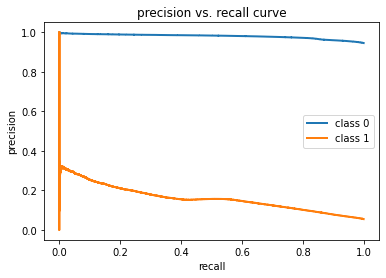

[0.9796044860258701, 0.15931850467936007]
0.5694614953526151


In [49]:
from sklearn.metrics import *
precision = dict()
recall = dict()

auc_ls = []
for i in range(2):
    y_test_arg = decide_apply_cat(y_test, 2)
    precision[i], recall[i], _ = precision_recall_curve(y_test_arg[:, i],
                                                        y_pred[:, i])
    auc_ls.append(auc(recall[i], precision[i]))
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()
print(auc_ls)
print(np.mean(auc_ls))

# baseline is 28.8

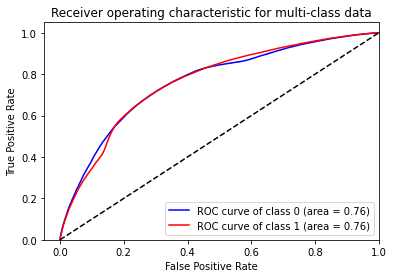

In [50]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    y_test_arg = decide_apply_cat(y_test, 2)
    fpr[i], tpr[i], _ = roc_curve(y_test_arg[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


In [442]:
# two-stage

#               precision    recall  f1-score   support

#    non_buyer       0.89      0.97      0.93    798645
#        buyer       0.52      0.21      0.30    126508

#     accuracy                           0.87    925153
#    macro avg       0.70      0.59      0.61    925153
# weighted avg       0.84      0.87      0.84    925153



In [174]:
# last

#               precision    recall  f1-score   support

#      class 0       0.96      0.94      0.95    874626
#      class 1       0.26      0.35      0.30     50527

#     accuracy                           0.91    925153
#    macro avg       0.61      0.65      0.62    925153
# weighted avg       0.92      0.91      0.92    925153



In [449]:
Counter(test_dataset['all_test'][1])

Counter({0: 874626, 1: 50527})

## Train classifier


In [ ]:
test_dataset = construct_test_dataset()

In [51]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5029650829836237970
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10750486144
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 17858519705607229779
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 10768659264
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 10387560450709763222
physical_device_desc: "device: 1, name: GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1"
]
Default GPU Device: /device:GPU:0


In [52]:
wgangp.load_model()

In [97]:
X_train, y_train, _,train_inp_len = dataset['all_train_under']
X_valid, y_valid, _, valid_inp_len = dataset['all_valid']

In [98]:
d = Counter(y_train)
print(d)
buyers = d[1]

Counter({0: 2054157, 1: 411137})


In [ ]:
np.random.randint(0,2,20)

In [116]:
from scipy import sparse

n_samples = buyers
print(n_samples)
noise = tf.random.normal([n_samples, wgangp.noise_dim], dtype=tf.dtypes.float32)
fake_labels = tf.random.uniform(shape=(n_samples,1), minval=1, maxval=14, dtype=tf.dtypes.float32)

82219


In [117]:
X_fake = wgangp.generator.predict([noise, fake_labels])

X_fake = [sparse.csr_matrix(k) for k in X_fake]
y_fake = np.ones(len(X_fake))


In [118]:
from lib.utils import process_input

encoders = process_input.get_one_hot_encoders()
idx = np.random.randint(0, len(X_fake), 1)[0]

x = apply_pad_2(np.array([X_fake[idx].copy().toarray()]), 13)

            
scale.create_readable_df_stg(x[0], get_gen_outs(), encoders), y_class[idx], len_inp[idx]

(    item_id  category        day      hour     month       week   dwelltime  \
 0       0.0       0.0  -0.344491 -0.622070 -0.554784   0.662478   -1.096551   
 1       0.0       0.0   0.309961 -0.440913 -0.221575  -0.422873   -1.318120   
 2       0.0       0.0   0.369693 -0.430992 -0.271410   0.086379   -1.141201   
 3       6.0     227.0  21.532719  1.652012  6.978413  18.688683    1.044306   
 4       5.0     227.0  21.982217  1.468816  5.162730  25.701746    3.536701   
 5       6.0     227.0  24.263094  1.354110  5.748963  29.663246  272.327152   
 6       5.0     227.0  24.139629  0.571787  2.988598  33.038901  314.553195   
 7       6.0     227.0  25.275019  0.385223  6.414766  22.320176  399.020594   
 8       7.0     227.0  29.868389 -0.015281  5.412965  22.495718   35.965547   
 9       2.0     227.0  28.393346  0.696137  4.933376  27.019123    1.906993   
 10      4.0     227.0  25.154412 -0.145619  5.737052  21.077616  191.661614   
 11      3.0     227.0  24.049266  0.673

In [119]:
X_train = np.concatenate((X_train, X_fake))
y_train = np.concatenate((y_train, y_fake))


In [74]:
np.save("X_fake.npy",X_fake)

In [75]:
import gc
gc.collect()

2673

In [70]:
Counter(y_train)

NameError: name 'y_train' is not defined

In [ ]:
del dataset
gc.collect()

In [130]:
isinstance(X_train[0], np.array)

TypeError: isinstance() arg 2 must be a type or tuple of types

In [131]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3036834515310551393
]
Please install GPU version of TF


In [99]:
N = 13
F = dataset['all_train_under'][0][0].toarray().shape[-1]
F,N
X_in = Input((N,F))

len_in = Input((1,))
x = X_in

use_len_label =False

if use_len_label:
    l_in = Lambda(lambda x: x[:,0])(len_in)
    l_in = Embedding(N+1, N)(l_in)
    l_in = RepeatVector(N)(l_in)
    x = Concatenate()([X_in, l_in])      

# x = Masking(MASK_VALUE)(x)
# x = (GRU(128, return_sequences = True,activation='relu'))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)

# x = TCN(input_shape=(N, F),nb_filters=32,kernel_size=3, dilations=(1, 2, 4, 8,16,32), return_sequences=True)(x)

print(wgangp.critic.layers[:-7])

x = wgangp.critic.layers[-8].output
print(x)
x = TCN(input_shape=(N, F),nb_filters=32,kernel_size=3, name='trainable_tcn', dilations=(1, 2), return_sequences=True)(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = build_dense_models(50, 1, x, False)



x1 = Dense(2, 'softmax',name='disc')(x)

loss_f1 = 'categorical_crossentropy'

opt = Adam(lr=1e-3)
model_in = X_in if use_len_label == False else [X_in, len_in]
model =  Model(inputs=wgangp.critic.input, outputs=x1)
model.compile(optimizer = opt,loss = loss_f1, metrics = ['accuracy', AUC(name='auc', multi_label=False)])
model.summary()

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2d4fed54f0>, <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2d4fd346a0>, <tensorflow.python.keras.layers.core.RepeatVector object at 0x7f2d4fa7e9a0>, <tensorflow.python.keras.layers.merge.Concatenate object at 0x7f2d4f4e5340>, <tcn.tcn.TCN object at 0x7f2d4f4e0280>]
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 64), dtype=tf.float32, name=None), name='tcn_2/add_4/add_2:0', description="created by layer 'tcn_2'")
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
len_in (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 13, 356)]    0                    

In [100]:
Counter(y_train)

Counter({0: 2054157, 1: 411137})

In [101]:

batch_size = 1024

validD = DataGenerator(X_valid, y_valid, 13, valid_inp_len, batch_size, True,True)
def evalu():
    print(wgangp.buyer_classifier.evaluate(validD))

class Eval(keras.callbacks.Callback):
    def __init__(self, validD, validation=None):
        super(Eval, self).__init__()
        self.validD = validD
        self.valid_loss, self.valid_acc, self.valid_auc = [],[],[]
    
#     def on_train_begin(self, logs={}):
        
    def on_epoch_end(self, batch, logs={}):
        loss, acc, auc = wgangp.buyer_classifier.evaluate(self.validD)
        self.valid_loss.append(loss)
        self.valid_acc.append(acc)
        self.valid_auc.append(auc)

from tensorflow.keras.callbacks import * 
batch_size = 1024

checkpoint_filepath='./cache/normal_classifier.h5'
m = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
m2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

h = model.fit(
    DataGenerator(X_train[:], y_train[:], 13, train_inp_len[:],  64, True, True),
    validation_data=validD,
    callbacks = [m,m2], shuffle=True,
    epochs=100)
        

Epoch 1/100
38521/38521 [==============================] - 193s 5ms/step - loss: 0.3651 - accuracy: 0.8452 - auc: 0.9174 - val_loss: 0.3585 - val_accuracy: 0.8476 - val_auc: 0.9206
Epoch 2/100
38521/38521 [==============================] - 190s 5ms/step - loss: 0.3602 - accuracy: 0.8473 - auc: 0.9197 - val_loss: 0.3588 - val_accuracy: 0.8478 - val_auc: 0.9207
Epoch 3/100
38521/38521 [==============================] - 190s 5ms/step - loss: 0.3607 - accuracy: 0.8473 - auc: 0.9194 - val_loss: 0.3576 - val_accuracy: 0.8481 - val_auc: 0.9210
Epoch 4/100
38521/38521 [==============================] - 190s 5ms/step - loss: 0.3596 - accuracy: 0.8479 - auc: 0.9200 - val_loss: 0.3576 - val_accuracy: 0.8477 - val_auc: 0.9210
Epoch 5/100
38521/38521 [==============================] - 190s 5ms/step - loss: 0.3595 - accuracy: 0.8479 - auc: 0.9200 - val_loss: 0.3575 - val_accuracy: 0.8477 - val_auc: 0.9211
Epoch 6/100
38521/38521 [==============================] - 190s 5ms/step - loss: 0.3597 - accur

KeyboardInterrupt: 

In [102]:
model.load_weights(checkpoint_filepath)

In [103]:
from sklearn.metrics import classification_report
 
X_test, y_test, _, SIT, test_inp_len = test_dataset['all_test']
y_pred = model.predict(DataGenerator(X_test[:], y_test[:], 13, test_inp_len[:],  512, True, True), verbose=1)



1807/1807 [==============================] - 27s 15ms/step


In [104]:
y_pred_arg = y_pred
y_pred_max = np.argmax(y_pred_arg,axis=1)
Counter(y_pred_max)

Counter({0: 887323, 1: 37830})

In [105]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_max, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.96    874626
     class 1       0.31      0.24      0.27     50527

    accuracy                           0.93    925153
   macro avg       0.64      0.60      0.62    925153
weighted avg       0.92      0.93      0.93    925153



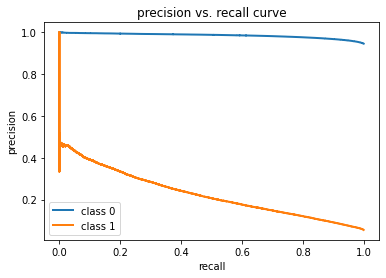

[0.9843033017766202, 0.22537191951276872]
0.6048376106446944


In [106]:
from sklearn.metrics import *
precision = dict()
recall = dict()

auc_ls = []
for i in range(2):
    y_test_arg = decide_apply_cat(y_test, 2)
    precision[i], recall[i], _ = precision_recall_curve(y_test_arg[:, i],
                                                        y_pred[:, i])
    auc_ls.append(auc(recall[i], precision[i]))
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()
print(auc_ls)
print(np.mean(auc_ls))

# baseline is 28.8

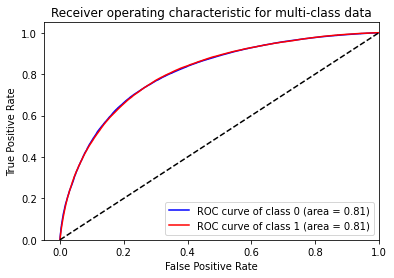

In [107]:
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    y_test_arg = decide_apply_cat(y_test, 2)
    fpr[i], tpr[i], _ = roc_curve(y_test_arg[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
